# **План проекта**        
        
[Описание проекта](#Рекомендация-тарифов)   

[1 Загрузка и изучение данных](#Откройте-и-изучите-файл)   

[2 Подготовка данных](#Разбейте-данные-на-выборки)   

[3 Исследование моделей](#Исследуйте-модели)   
- [3.1 Модель DecisionTreeClassifier](#Модель-DecisionTreeClassifier)
- [3.2 Модель RandomForestClassifier](#Модель-RandomForestClassifier)
- [3.3 Модель LogisticRegression](#Модель-LogisticRegression)
- [3.4 Результаты исследования](#Результаты-исследования-моделей)

[4 Проверка моделей на тестовой выборке](#Проверьте-модель-на-тестовой-выборке)  

[5 Проверка на адекватность](#(бонус)-Проверьте-модели-на-адекватность)   

[6 Выводы](#Выводы)

# Описание проекта   
**"Рекомендация тарифов"**


Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».   
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф.   
Необходимо исследовать модели и выбрать ту, которая покажет максимально большое значениеме accuracy. Доля правильных ответов должна быть не ниже 0.75.

**Необходимо**:   
1. Загрузить и изучить данные.
2. Подготовить данные.
3. Исследовать модели (больше одной).
4. Проверить качество модели на тестовой выборке.
5. Проверить модель на адекватность
6. Сделать выводы из полученных результатов.


**Задача**:   
- Нужно построить модель для задачи классификации, которая выберет подходящий тариф для потенциальных клиентов

**Описание данных**   
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.   
Известно:   
*сalls* — количество звонков,   
*minutes* — суммарная длительность звонков в минутах,   
*messages* — количество sms-сообщений,   
*mb_used* — израсходованный интернет-трафик в Мб,   
*is_ultra* — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).   

## Откройте и изучите файл

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('/datasets/users_behavior.csv')
https://code.s3.yandex.net/datasets/users_behavior.csv

def dataframe_info(df, head=True, describe=True, info=True, missing_values=True, duplicates=True):
    if head:
        print("Первые строки:")
        display(df.head())
        print("\n")
    
    if describe:
        print("Описательная статистика:")
        display(df.describe())
        print("\n")
    
    if info:
        print("Информация о DataFrame:")
        df.info()
        print("\n")
        
    
    if missing_values:
        missing_values_count = df.isna().sum()
        if missing_values_count.sum() > 0:
            print("Пропущенные значения:")
            display(missing_values_count)
            print("\n")
        else:
            print("Пропущенные значения не найдены.")
            
    if duplicates:
        duplicates_count = df.duplicated().sum()
        if duplicates_count > 0:
            print("Количество дубликатов:", duplicates_count)
            print("Дубликаты:")
            display(df[df.duplicated()])
            print("\n")
        else:
            print("Дубликатов не найдено.")

dataframe_info(df, head=True, describe=True, duplicates=True, missing_values=True, info=True)

Первые строки:


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0




Описательная статистика:


,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000




Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Пропущенные значения не найдены.
Дубликатов не найдено.


Количество звонков и сообщений не может быть дробным, изменим тип значений в этих столбцах и проверим результат

In [3]:
df['messages'], df['calls'] = df['messages'].astype("int"), df['calls'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   int64  
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   int64  
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 125.7 KB


Изучение данных показало:    
3214 строк   
5 столбцов   
нет пропущенных значений   
нет дубликатов   

Так как количество звонков и сообщений не может быть дробным, мы изменили тип значений в этих столбцах на целочисленный

In [4]:
df['is_ultra'].value_counts(normalize=True)


0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

Распределение по тарифам ~31% на ~69%, 

## Разбейте данные на выборки

In [5]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

Разделим данные на три части: обучающую, валидационную и тестовую в соотношении 3:1:1.

In [6]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify = target)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345, stratify = target_valid)

In [7]:
display(features_train.shape)
display(target_train.shape)
display(features_valid.shape)
display(target_valid.shape)
display(features_test.shape)
target_test.shape

(1928, 4)

(1928,)

(643, 4)

(643,)

(643, 4)

(643,)

In [8]:
display(target_train.value_counts(normalize=True))
display(target_valid.value_counts(normalize=True))
target_test.value_counts(normalize=True)

0    0.693465
1    0.306535
Name: is_ultra, dtype: float64

0    0.693624
1    0.306376
Name: is_ultra, dtype: float64

0    0.693624
1    0.306376
Name: is_ultra, dtype: float64

Дисбаланс сохранился

## Исследуйте модели

### Модель DecisionTreeClassifier

In [9]:
best_model_tree = None
best_result_tree = 0
best_depth_tree = 0
for depth in range(1, 5):
    model = DecisionTreeClassifier(random_state=12345, max_depth = depth)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result_tree:
        best_model_tree = model
        best_result_tree = result
        best_depth_tree = depth

print("Accuracy наилучшей модели Решающее дерево на валидационной выборке:", best_result_tree, 'Глубина деревьев:', best_depth_tree)
    

Accuracy наилучшей модели Решающее дерево на валидационной выборке: 0.7776049766718507 Глубина деревьев: 3


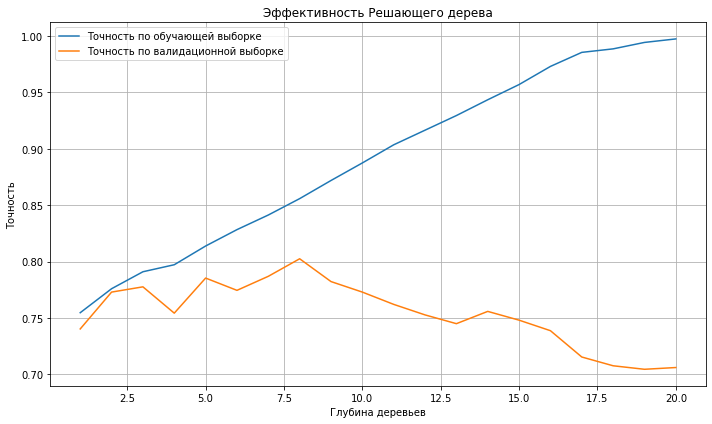

In [19]:
train_scores = []
valid_scores = []


depth_range = range(1, 21)


for depth in depth_range:
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    train_score = model.score(features_train, target_train)
    valid_score = model.score(features_valid, target_valid)

    train_scores.append(train_score)
    valid_scores.append(valid_score)

plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_scores, label='Точность по обучающей выборке')
plt.plot(depth_range, valid_scores, label='Точность по валидационной выборке')
plt.xlabel('Глубина деревьев')
plt.ylabel('Точность')
plt.title('Эффективность Решающего дерева')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

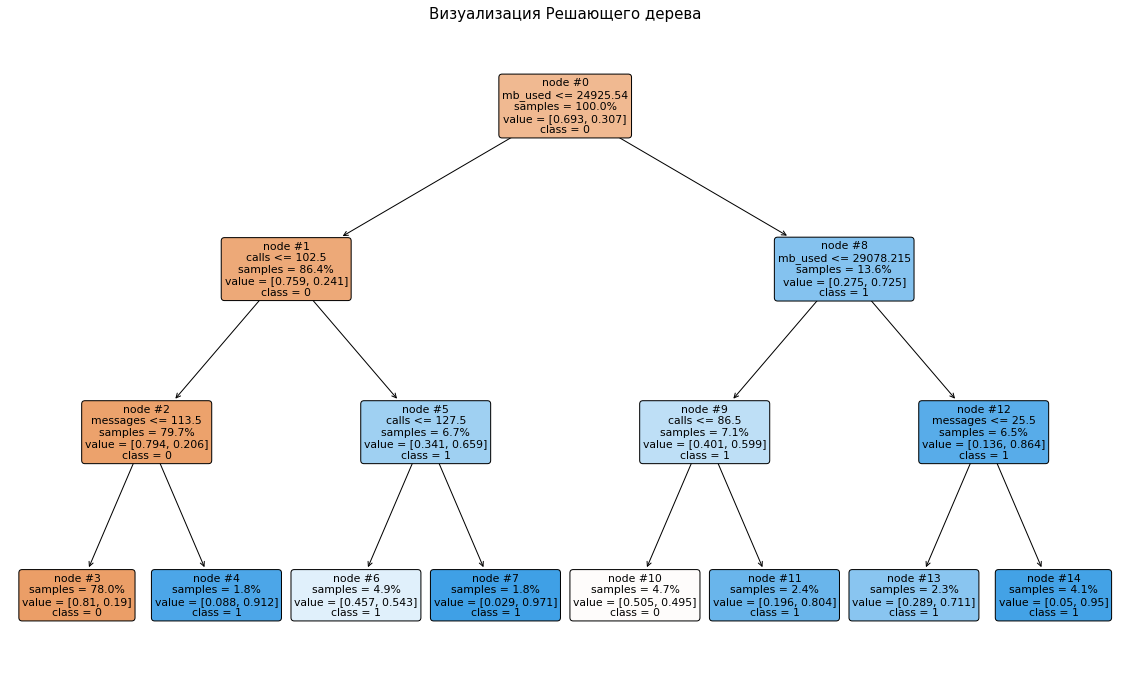

In [11]:


plt.figure(figsize=(20, 12))
plot_tree(best_model_tree, 
          feature_names=features.columns, 
          class_names=['0', '1'], 
          impurity=False,  # Не показывать меру неопределенности
          proportion=True,  # Показывать доли классов в узлах
          rounded=True,  # Закруглить углы узлов
          node_ids=True,  # Показывать ID узлов
          max_depth=3,  # Ограничить глубину дерева
          filled=True)  # Закрасить узлы

plt.title('Визуализация Решающего дерева', fontsize=15)
plt.show()

### Модель RandomForestClassifier

In [12]:
%%time 
best_model_forest = None
best_result_forest = 0
best_depth_forest = 0
best_est = 0
for depth in range(1, 6):
    for est in range(1, 50):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        result = model.score(features_valid, target_valid)
        if result > best_result_forest:
            best_model_forest = model
            best_result_forest = result
            best_depth_forest = depth
            best_est = est
            
            

print("Accuracy наилучшей модели Случайный лес на валидационной выборке:", best_result_forest, 'Количество деревьев:', best_est, 'Глубина дерева', best_depth_forest)

Accuracy наилучшей модели Случайный лес на валидационной выборке: 0.7993779160186625 Количество деревьев: 38 Глубина дерева 4
CPU times: user 13.4 s, sys: 70.9 ms, total: 13.5 s
Wall time: 13.5 s


### Модель LogisticRegression

In [13]:
best_model_log = None
best_result_log = 0
best_iter = 0
for itr in range(1000, 10001, 1000):
    model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=itr)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result_log:
        best_model_log = model
        best_result_log = result
        best_iter = itr

print("Accuracy наилучшей модели Логистическая регрессия на валидационной выборке:", best_result_log, 'Количество итераций обучения:', best_iter)

Accuracy наилучшей модели Логистическая регрессия на валидационной выборке: 0.7387247278382582 Количество итераций обучения: 1000


### Результаты исследования моделей

In [14]:
print('На валидационной выборке:')
print("Accuracy для модели Решающее дерево:", best_result_tree, 'Глубина деревьев:', best_depth_tree)
print("Accuracy для модели Случайный лес:", best_result_forest, 'Количество деревьев:', best_est)
print("Accuracy для модели Логистическая регрессия:", best_result_log, 'Количество итераций обучения:', best_iter)

if best_result_tree > best_result_forest and best_result_tree > best_result_log:
    best_result = best_result_tree
    best_model = f'Решающее дерево, при глубине {best_depth},'
elif best_result_forest > best_result_tree and best_result_forest > best_result_log:
    best_result = best_result_forest
    best_model = f'Случайный лес, при количестве деревьев {best_est},'
elif best_result_log > best_result_tree and best_result_log > best_result_forest:
    best_result = best_result_log
    best_model = f'Логистическая регрессия, при количестве итераций обучения {best_iter},'

print('\n')
print('Лучший результат на валидационной выборке показала модель -', best_model, 'с точностью', best_result)

На валидационной выборке:
Accuracy для модели Решающее дерево: 0.7776049766718507 Глубина деревьев: 3
Accuracy для модели Случайный лес: 0.7993779160186625 Количество деревьев: 38
Accuracy для модели Логистическая регрессия: 0.7387247278382582 Количество итераций обучения: 1000


Лучший результат на валидационной выборке показала модель - Случайный лес, при количестве деревьев 38, с точностью 0.7993779160186625


## Проверьте модель на тестовой выборке

Проверим модели

**Комментарий:   
Можно было проверять одну (или две) лучшую модель, для того чтобы подтвердить результат исследования моделей - решил оставить - на итоговый результат наличие двух (или одной) личшней проверки не влияет**

In [15]:
combined_features = pd.concat([features_train, features_valid])
display(combined_features.shape)
combined_target = pd.concat([target_train, target_valid])
display(combined_target.shape)
display(combined_target.value_counts(normalize=True))


(2571, 4)

(2571,)

0    0.693504
1    0.306496
Name: is_ultra, dtype: float64

In [16]:
combined_model = RandomForestClassifier(random_state=12345, n_estimators=38, max_depth=4)
combined_model.fit(combined_features, combined_target)


RandomForestClassifier(max_depth=4, n_estimators=38, random_state=12345)

In [17]:
test_score_forest = combined_model.score(features_test, target_test)

print('\n')
print('Модель Случайный лес на тестовой выборке показала точность', test_score_forest)



Модель Случайный лес на тестовой выборке показала точность 0.8087091757387247


## (бонус) Проверьте модели на адекватность

In [18]:
dummy_model = DummyClassifier(strategy="most_frequent", random_state=12345)
dummy_model.fit(features_train, target_train)

test_score_dummy = dummy_model.score(features_test, target_test)
print("Accuracy на тестовой выборке для DummyClassifier:", test_score_dummy)


print('\n')
if test_score_dummy > test_score_forest:
    print(f'Модель Случайный лес неадекватна, необходимо вернуться к исследованию и проверке моделей')
else:
    print(f'Модель Случайный лес лучше фиктивного классификатора, соответственно она адекватна')

Accuracy на тестовой выборке для DummyClassifier: 0.6936236391912908


Модель Случайный лес лучше фиктивного классификатора, соответственно она адекватна


## Выводы

**"Рекомендация тарифов"**


Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».   
В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Нужно построить модель для задачи классификации, которая выберет подходящий тариф.   
Необходимо исследовать модели и выбрать ту, которая покажет максимально большое значениеме accuracy. Доля правильных ответов должна быть не ниже 0.75.

**Необходимо**:   
1. Загрузить и изучить данные.
2. Подготовить данные.
3. Исследовать модели (больше одной).
4. Проверить качество модели на тестовой выборке.
5. Проверить модель на адекватность
6. Сделать выводы из полученных результатов.


**Задача**:   
- Нужно построить модель для задачи классификации, которая выберет подходящий тариф для потенциальных клиентов

**Описание данных**   
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц.   
Известно:   
*сalls* — количество звонков,   
*minutes* — суммарная длительность звонков в минутах,   
*messages* — количество sms-сообщений,   
*mb_used* — израсходованный интернет-трафик в Мб,   
*is_ultra* — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).   


**Изучение данных показало:*    
3214 строк   
5 столбцов   
нет пропущенных значений   
нет дубликатов   

Так как количество звонков и сообщений не может быть дробным, мы изменили тип значений в этих столбцах на целочисленный

Согласно ТЗ мы разделили данные на три части: обучающую, валидационную и тестовую в соотношении 3:1:1.

**Исследовали три модели**   
- Модель DecisionTreeClassifier   
- Модель RandomForestClassifier
- Модель LogisticRegression

На валидационной выборке:
- Accuracy для модели Решающее дерево: 0.7776049766718507 Глубина деревьев: 3
- Accuracy для модели Случайный лес: 0.7993779160186625 Количество деревьев: 38
- Accuracy для модели Логистическая регрессия: 0.7387247278382582 Количество итераций обучения: 1000


Лучший результат на валидационной выборке показала модель - Случайный лес, при количестве деревьев 38, с точностью 0.7993779160186625




**После проверили на тестовой выборке**
Модель Случайный лес на тестовой выборке показала точность 0.8087091757387247
Точность оказалась немного выше, чем на валидационной выборке. Значение выше 0.75 - значит нам подходит

**Провели проверку на адекатность**
Accuracy на тестовой выборке для DummyClassifier: 0.6842923794712286
Модель Случайный лес лучше фиктивного классификатора, соответственно она адекватна

Поставленная задача - **выполнена** модель можно использовать для выбора и предложения тарифа потенциальным клиентам 
